Exploring several features

In [115]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from source.features import *

In [116]:
RESOURCES_DIR = Path('../resources')
DATASETS_PATH = RESOURCES_DIR / "datasets"
WORD_EMBEDDINGS_NAME = "glove.42B.300d"
DUMPS_DIR = RESOURCES_DIR / "DUMPS"

In [117]:
sentences_pair = {"simple_text": "esta es la version complicada", "original_text": "esta es la version complicada"}

In [118]:
char = CharLengthRatio()
sentences_pair = char.get_ratio(sentences_pair)
sentences_pair

{'simple_text': 'esta es la version complicada',
 'original_text': 'esta es la version complicada',
 'CLR': 1.0}

In [119]:
word_length = WordLengthRatio()
sentences_pair = word_length.get_ratio(sentences_pair)
sentences_pair

{'simple_text': 'esta es la version complicada',
 'original_text': 'esta es la version complicada',
 'CLR': 1.0,
 'WLR': 1.0}

In [120]:
levenshtein = LevenshteinRatio()
sentences_pair = levenshtein.get_ratio(sentences_pair)
sentences_pair

{'simple_text': 'esta es la version complicada',
 'original_text': 'esta es la version complicada',
 'CLR': 1.0,
 'WLR': 1.0,
 'LR': 1.0}

In [121]:
dependency = DependencyTreeDepthRatio()
sentences_pair = dependency.get_ratio(sentences_pair)
sentences_pair

{'simple_text': 'esta es la version complicada',
 'original_text': 'esta es la version complicada',
 'CLR': 1.0,
 'WLR': 1.0,
 'LR': 1.0,
 'DTDR': 1.0}

In [122]:
word_rank = WordRankRatio()
sentences_pair = word_rank.get_ratio(sentences_pair)
sentences_pair

{'simple_text': 'esta es la version complicada',
 'original_text': 'esta es la version complicada',
 'CLR': 1.0,
 'WLR': 1.0,
 'LR': 1.0,
 'DTDR': 1.0,
 'WRR': 1.0}

Exploring features values from simpleText shared task

In [123]:
lmfill = LMFillMaskRatio()
sentences_pair = lmfill.get_ratio(sentences_pair)
sentences_pair

C:\Users\Antonio\PycharmProjects\Simplification_experiments\venv\lib\site-packages\transformers\models\auto\modeling_auto.py:969: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(


{'simple_text': 'esta es la version complicada',
 'original_text': 'esta es la version complicada',
 'CLR': 1.0,
 'WLR': 1.0,
 'LR': 1.0,
 'DTDR': 1.0,
 'WRR': 1.0,
 'LMFMR': 1.0}

In [124]:
SIMPLETEXT_DATASET_PATH = DATASETS_PATH / "simpleText_test"

In [125]:
complex_text = pd.read_csv(SIMPLETEXT_DATASET_PATH / "simpleText_test.test.complex.txt", header=None, sep="\t", names=["original_text"])
simple_text = pd.read_csv(SIMPLETEXT_DATASET_PATH / "simpleText_test.test.simple.txt", header=None, sep="\t",names=["simple_text"])

In [126]:
sentences_pairs = pd.concat([complex_text, simple_text], axis=1)
sentences_pairs = sentences_pairs
sentences_pairs

,original_text,simple_text
0,"In the modern era of automation and robotics, ...",Current academic and industrial research is in...
1,With the ever increasing number of unmanned ae...,Drones are increasingly used in the civilian a...
2,Due to guidelines set by the governments regar...,Governments set guidelines on the operation ce...
3,In an attempt to achieve the above mentioned t...,Researchers propose data-driven solutions allo...
4,Derived from the classic image classification ...,"The algorithm, based on the Inception model, d..."
...,...,...
643,Bodybuilders generally train with moderate loa...,Bodybuilders train with moderate loads and sho...
644,"Powerlifters, on the other hand, routinely tra...","Powerlifters, on the other hand, train with hi..."
645,Although both groups are known to display impr...,Although both groups are known to display impr...
646,It has been shown that many factors mediate th...,It has been shown that many factors mediate th...


In [127]:
%%time
results = []
for i,row in sentences_pairs.iterrows():
    sentences_pair = dict(original_text=row['original_text'], simple_text=row['simple_text'])
    sentences_pair = char.get_ratio(sentences_pair)
    sentences_pair = word_length.get_ratio(sentences_pair)
    sentences_pair = levenshtein.get_ratio(sentences_pair)
    sentences_pair = dependency.get_ratio(sentences_pair)
    sentences_pair = word_rank.get_ratio(sentences_pair)
    sentences_pair = lmfill.get_ratio(sentences_pair)
    results.append(sentences_pair)

CPU times: total: 1h 23min 35s
Wall time: 14min 23s


In [128]:
len(results)
results_df = pd.DataFrame(results)

In [129]:
results_df

,original_text,simple_text,CLR,WLR,LR,DTDR,WRR,LMFMR
0,"In the modern era of automation and robotics, ...",Current academic and industrial research is in...,0.62,0.52,0.39,0.80,0.92,2.000000
1,With the ever increasing number of unmanned ae...,Drones are increasingly used in the civilian a...,0.49,0.50,0.55,0.36,1.07,0.686243
2,Due to guidelines set by the governments regar...,Governments set guidelines on the operation ce...,0.89,0.91,0.79,0.75,0.99,0.822775
3,In an attempt to achieve the above mentioned t...,Researchers propose data-driven solutions allo...,0.67,0.57,0.64,0.70,1.03,0.935785
4,Derived from the classic image classification ...,"The algorithm, based on the Inception model, d...",0.72,0.71,0.50,0.56,0.99,0.581586
...,...,...,...,...,...,...,...,...
643,Bodybuilders generally train with moderate loa...,Bodybuilders train with moderate loads and sho...,0.51,0.53,0.67,0.50,1.00,1.801608
644,"Powerlifters, on the other hand, routinely tra...","Powerlifters, on the other hand, train with hi...",0.80,0.84,0.89,0.80,0.96,0.566204
645,Although both groups are known to display impr...,Although both groups are known to display impr...,1.03,1.05,0.89,1.20,0.94,0.511890
646,It has been shown that many factors mediate th...,It has been shown that many factors mediate th...,0.93,1.03,0.88,0.86,0.92,1.069596


Summary statistics

In [130]:
results_df.describe()

,CLR,WLR,LR,DTDR,WRR,LMFMR
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,0.805602,0.851250,0.743287,0.908256,0.974614,1.087112
std,0.243792,0.423034,0.157618,0.324851,0.070011,0.513309
min,0.180000,0.160000,0.250000,0.200000,0.710000,0.000000
25%,0.650000,0.670000,0.640000,0.710000,0.940000,0.812609
50%,0.790000,0.815000,0.760000,0.890000,0.990000,1.000000
75%,0.930000,0.960000,0.860000,1.000000,1.002500,1.380721
max,2.150000,5.880000,1.000000,3.330000,1.260000,2.000000


In [131]:
results_df.describe()

,CLR,WLR,LR,DTDR,WRR,LMFMR
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,0.805602,0.851250,0.743287,0.908256,0.974614,1.087112
std,0.243792,0.423034,0.157618,0.324851,0.070011,0.513309
min,0.180000,0.160000,0.250000,0.200000,0.710000,0.000000
25%,0.650000,0.670000,0.640000,0.710000,0.940000,0.812609
50%,0.790000,0.815000,0.760000,0.890000,0.990000,1.000000
75%,0.930000,0.960000,0.860000,1.000000,1.002500,1.380721
max,2.150000,5.880000,1.000000,3.330000,1.260000,2.000000


Character Length Ratio

C:\Users\Antonio\PycharmProjects\Simplification_experiments\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


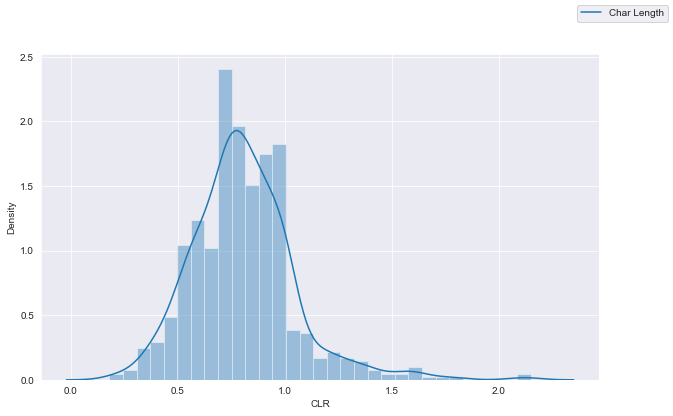

In [132]:
fig = plt.figure(figsize=(10,6))
sns.distplot(results_df["CLR"])
fig.legend(labels=['Char Length'])
plt.show()

C:\Users\Antonio\PycharmProjects\Simplification_experiments\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


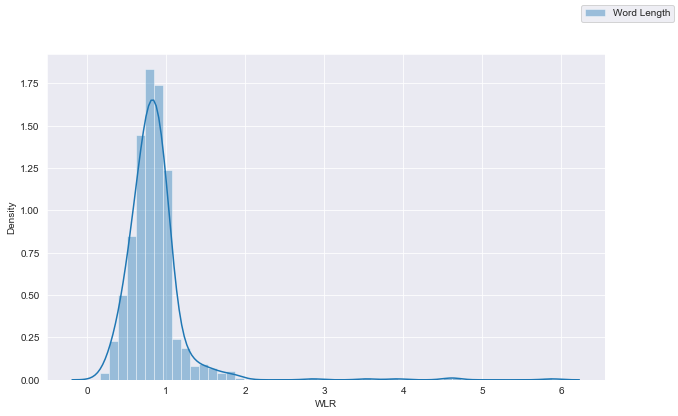

In [133]:
fig = plt.figure(figsize=(10,6))
sns.distplot(results_df["WLR"],label="Word Length")
fig.legend(labels=['Word Length'])
plt.show()

C:\Users\Antonio\PycharmProjects\Simplification_experiments\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


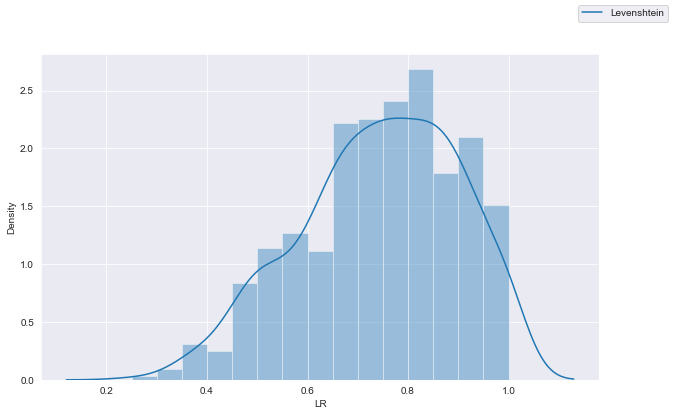

In [134]:
fig = plt.figure(figsize=(10,6))
sns.distplot(results_df["LR"])
fig.legend(labels=['Levenshtein'])
plt.show()

C:\Users\Antonio\PycharmProjects\Simplification_experiments\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


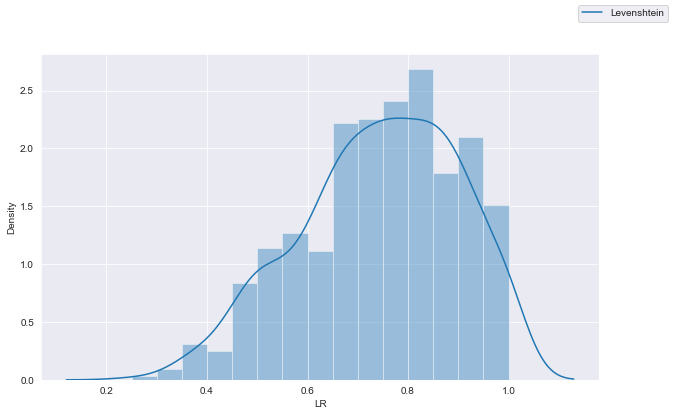

In [135]:
fig = plt.figure(figsize=(10,6))
sns.distplot(results_df["LR"])
fig.legend(labels=['Levenshtein'])
plt.show()

C:\Users\Antonio\PycharmProjects\Simplification_experiments\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


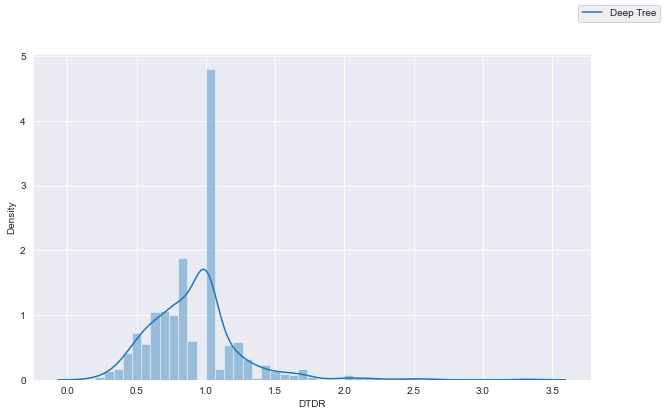

In [136]:
fig = plt.figure(figsize=(10,6))
sns.distplot(results_df["DTDR"])
fig.legend(labels=['Deep Tree'])
plt.show()

C:\Users\Antonio\PycharmProjects\Simplification_experiments\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


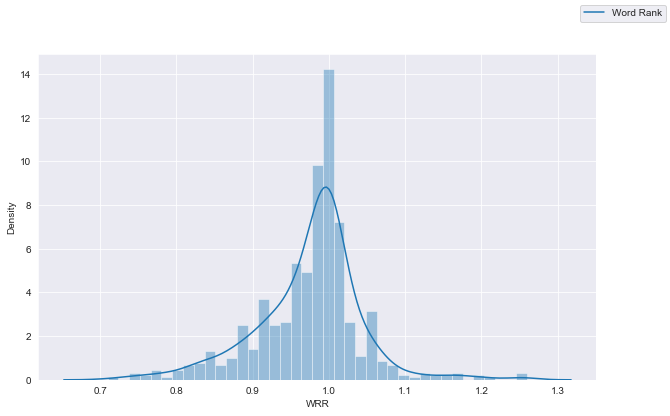

In [137]:
fig = plt.figure(figsize=(10,6))
sns.distplot(results_df["WRR"])
fig.legend(labels=['Word Rank'])
plt.show()

C:\Users\Antonio\PycharmProjects\Simplification_experiments\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


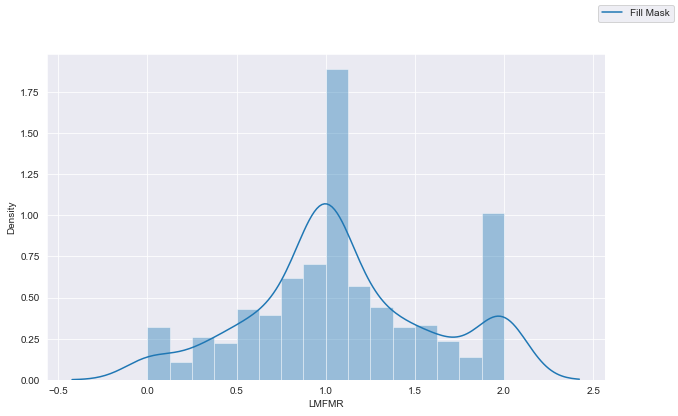

In [138]:
plt.show()
fig = plt.figure(figsize=(10, 6))
sns.distplot(results_df["LMFMR"])
fig.legend(labels=['Fill Mask'])
plt.show()

In [139]:
results_df.to_csv("simpleText_train_features.csv")

In [140]:
res = pd.read_csv("simpleText_train_features.csv")

In [141]:
res

,Unnamed: 0,original_text,simple_text,CLR,WLR,LR,DTDR,WRR,LMFMR
0,0,"In the modern era of automation and robotics, ...",Current academic and industrial research is in...,0.62,0.52,0.39,0.80,0.92,2.000000
1,1,With the ever increasing number of unmanned ae...,Drones are increasingly used in the civilian a...,0.49,0.50,0.55,0.36,1.07,0.686243
2,2,Due to guidelines set by the governments regar...,Governments set guidelines on the operation ce...,0.89,0.91,0.79,0.75,0.99,0.822775
3,3,In an attempt to achieve the above mentioned t...,Researchers propose data-driven solutions allo...,0.67,0.57,0.64,0.70,1.03,0.935785
4,4,Derived from the classic image classification ...,"The algorithm, based on the Inception model, d...",0.72,0.71,0.50,0.56,0.99,0.581586
...,...,...,...,...,...,...,...,...,...
643,643,Bodybuilders generally train with moderate loa...,Bodybuilders train with moderate loads and sho...,0.51,0.53,0.67,0.50,1.00,1.801608
644,644,"Powerlifters, on the other hand, routinely tra...","Powerlifters, on the other hand, train with hi...",0.80,0.84,0.89,0.80,0.96,0.566204
645,645,Although both groups are known to display impr...,Although both groups are known to display impr...,1.03,1.05,0.89,1.20,0.94,0.511890
646,646,It has been shown that many factors mediate th...,It has been shown that many factors mediate th...,0.93,1.03,0.88,0.86,0.92,1.069596
